# Analyis social media data to understand patterns of interactions and identify key influencers

### libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### import data

In [28]:
df = pd.read_csv("Instagram-Dec2022.csv")
df

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,Portuguese,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M
...,...,...,...,...,...,...,...,...,...
993,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
994,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
995,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
996,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K


### covert 1M into 1000000

In [29]:
#for followers and average engagement 

df["Followers"]=df["followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement Avg"]=df["Eng. (Avg.)"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df.drop(['followers','Eng. (Avg.)','Category_2','Eng. (Auth.)','instagram name','Rank'],axis=1,inplace=True)

In [30]:
df =df.rename(columns = {'Category_1':'Category','name':'Name','country':'Country'})
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,Portuguese,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
993,thiago6,Sports with a ball,United Kingdom,10400000,222700
994,soycintiacossio,Modeling,Colombia,6000000,390600
995,feat.dino,Lifestyle,South Korea,2700000,876400
996,djokernole,Sports with a ball,United States,11800000,197500


In [32]:
df=df.dropna()

In [33]:
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,Portuguese,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
993,thiago6,Sports with a ball,United Kingdom,10400000,222700
994,soycintiacossio,Modeling,Colombia,6000000,390600
995,feat.dino,Lifestyle,South Korea,2700000,876400
996,djokernole,Sports with a ball,United States,11800000,197500


In [34]:
df.isnull().sum()

Name              0
Category          0
Country           0
Followers         0
Engagement Avg    0
dtype: int64

### Engagement rate
ER=(Engagement Average/total Followers)*100

Less than 3.5% = Average 

Between 3.5% to 6% = Good

More than 6% = Very High


In [35]:
df['Engagement Rate']=np.round((df['Engagement Avg']/df['Followers'])*100,3)
df.head(15)

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710
1,cristiano,Sports with a ball,Portuguese,523000000,14700000,2.811
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776
3,kyliejenner,Fashion,United States,376300000,4300000,1.143
4,kendalljenner,Modeling,United States,268000000,5000000,1.866
5,arianagrande,Music,United States,345900000,3400000,0.983
6,selenagomez,Photography,United States,365400000,2900000,0.794
7,kimkardashian,Fashion,United States,337400000,2600000,0.771
8,k.mbappe,Sports with a ball,France,90400000,8400000,9.292
9,taylorswift,Music,Brazil,236500000,3000000,1.268


In [36]:
Target = []
for value in df["Engagement Rate"]:
    if value < 3.5:
        Target.append(0)
    if value >= 3.5 and value < 6:
        Target.append(1)
    if value>= 6:
        Target.append(2)
      
    
    
df["Target"] = Target  
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate,Target
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710,1
1,cristiano,Sports with a ball,Portuguese,523000000,14700000,2.811,0
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776,1
3,kyliejenner,Fashion,United States,376300000,4300000,1.143,0
4,kendalljenner,Modeling,United States,268000000,5000000,1.866,0
...,...,...,...,...,...,...,...
993,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141,0
994,soycintiacossio,Modeling,Colombia,6000000,390600,6.510,2
995,feat.dino,Lifestyle,South Korea,2700000,876400,32.459,2
996,djokernole,Sports with a ball,United States,11800000,197500,1.674,0


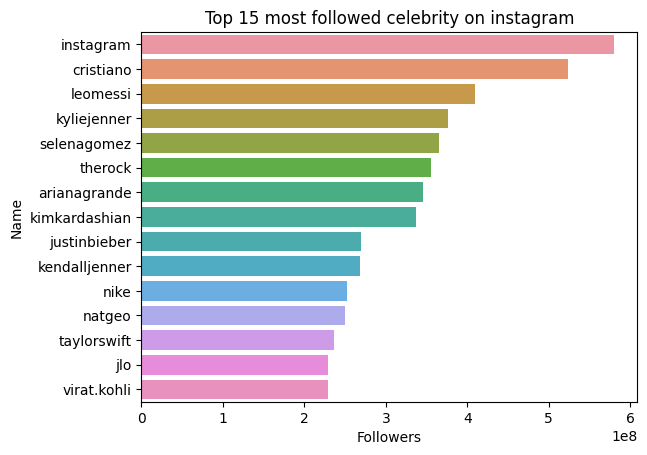

In [37]:
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='Name',x='Followers',data=df.sort_values(by='Followers',ascending=False).head(15))
plt.show()

In [38]:
def for_mini_followers_instagram(coun,cat):
    df1=df[df['Country']==coun]
    df1_mini=df1[df1['Followers']<60000000]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
   

In [39]:
for_mini_followers_instagram('India','Sports with a ball')

,Name,Followers,Target
969,chetri_sunil11,3500000,2
584,smriti_mandhana,6900000,2
997,ravindra.jadeja,4800000,2
112,hardikpandya93,24400000,1
119,rohitsharma45,26100000,1
463,klrahul,13400000,1
627,shikhardofficial,12900000,0
524,indiancricketteam,27000000,0
334,sachintendulkar,37500000,0


In [68]:
def for_mega_followers_instagram(coun,cat):
    df1=df[df['Country']==coun]
    df1_mini=df1[df1['Followers']>60000000]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [69]:
for_mega_followers_instagram('India','Sports with a ball')

,Name,Followers,Target
11,virat.kohli,228800000,0


In [70]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [71]:
def plot(df):
    plt.figure(figsize=(8,6))
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    plt.show()

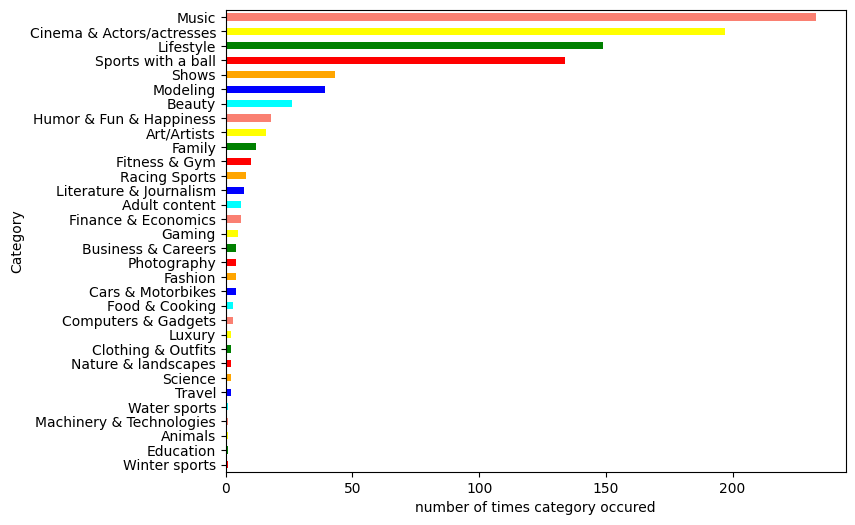

In [72]:
plot(df)

In [80]:
def demand(data,category):
    data[data['Category']==category]['Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)
    plt.show()

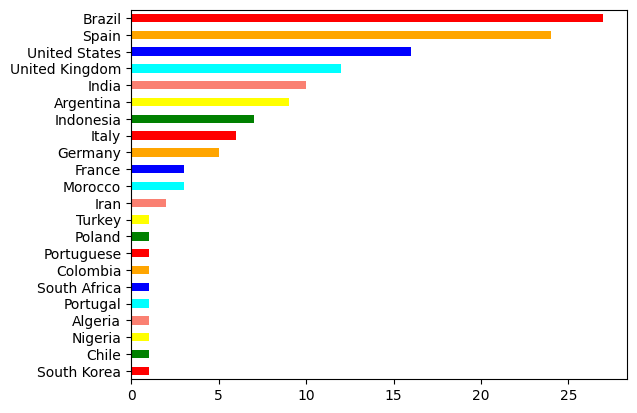

In [81]:
demand(df,'Sports with a ball')

### Model training

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['Target','Name','Category','Country',], axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear')

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,   0,   0],
       [  2,  30,   2],
       [  0,   0,  50]], dtype=int64)

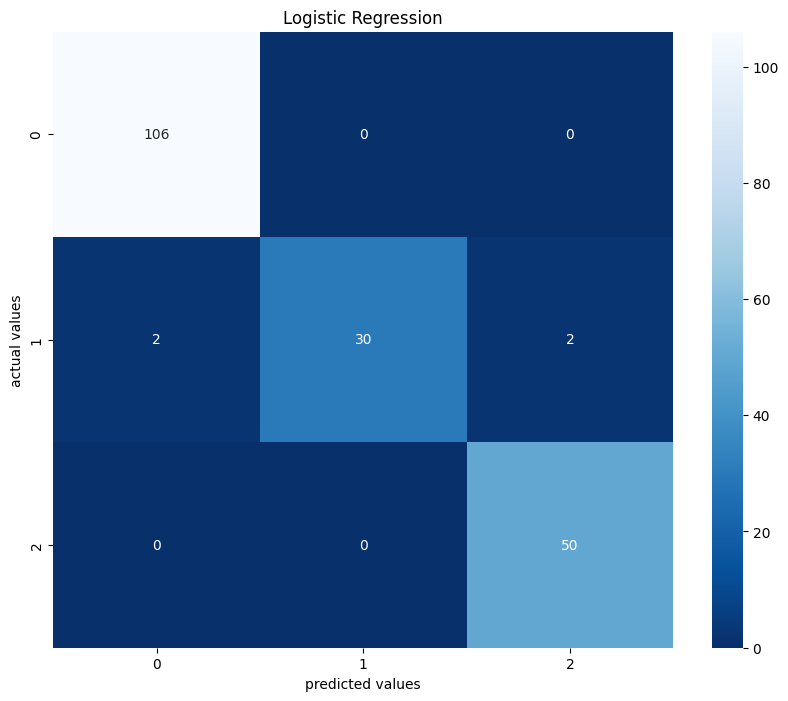

In [76]:
fig = plt.figure(figsize=(10,8))
cm_plot = sns.heatmap(cm,annot=True,fmt="d",cmap="Blues_r")
cm_plot.set_xlabel('predicted values')
cm_plot.set_ylabel('actual values')
cm_plot.set_title('Logistic Regression')
plt.show()

In [77]:
result = pd.DataFrame({'Model': 'Logistic Regression', 'Accuracy': acc},index=[0])
result

,Model,Accuracy
0,Logistic Regression,0.978947
